# 📚 Analyse Exploratoire des Filières Universitaires - Bac Lettres Tunisie 2025

---

## 🎯 Problématique

### Contexte : Une Baisse Alarmante du Taux de Réussite au Baccalauréat Lettres

Le système éducatif tunisien fait face à un défi majeur : **le taux de réussite au baccalauréat section Lettres connaît une chute significative**.

| Session | Taux de Réussite | Évolution |
|---------|-----------------|-----------|
| **2024** | 44.33% | - |
| **2025** | 39.10% | 📉 **-5.23 points** |

Cette baisse de plus de **5 points de pourcentage** représente une diminution relative de **11.8%** du nombre de bacheliers lettres potentiels.

### Questions Clés de cette EDA

> 🤔 **Face à cette réduction du vivier de candidats, quelles sont les opportunités qui s'offrent aux bacheliers lettres en Tunisie ?**

1. **Accessibilité** : Quelles filières ont des scores d'entrée plus accessibles en 2025 vs 2024 ?
2. **Répartition géographique** : Comment les offres sont-elles distribuées sur le territoire tunisien ?
3. **Diversité des formations** : Quels domaines et spécialisations sont disponibles ?
4. **Conditions d'admission** : Quelles contraintes spécifiques (sport, langue, âge) peuvent limiter l'accès ?
5. **Tendances** : Les scores d'orientation baissent-ils parallèlement au taux de réussite ?

---

**Auteur** : Data Analyst | **Date** : Janvier 2025 | **Source** : Données officielles d'orientation universitaire Tunisie

## 1. Chargement des Bibliothèques et Données

In [32]:
# Installation des packages si nécessaire
# install.packages(c("tidyverse", "ggplot2", "plotly", "scales", "knitr", "kableExtra", "viridis"))

# Chargement des bibliothèques
library(tidyverse)   # Manipulation de données et ggplot2
library(ggplot2)     # Visualisations
library(scales)      # Formatage des axes
library(knitr)       # Tableaux formatés
library(viridis)     # Palettes de couleurs accessibles

# Configuration des thèmes
theme_set(theme_minimal(base_size = 12))

# Palette de couleurs personnalisée
couleurs <- c("#2E86AB", "#A23B72", "#F18F01", "#C73E1D", "#3B1F2B", "#44AF69")

cat("Bibliotheques chargees avec succes!\n")

Bibliotheques chargees avec succes!


In [33]:
# Chargement des données nettoyées
df <- read.csv("data_cleaned.csv", fileEncoding = "UTF-8")

# Nettoyage des noms de colonnes (suppression des retours à la ligne)
df <- df %>%
  mutate(across(where(is.character), ~str_replace_all(., "\n", " "))) %>%
  mutate(across(where(is.character), str_trim))

# Renommer les colonnes pour faciliter l'analyse
colnames(df) <- c("Filiere", "Universite", "Etablissement", "Gouvernorat", 
                  "Criteres", "Duree", "Score_2025", "Score_2024", 
                  "Conditions", "Specialites")

# Aperçu des données
cat("APERCU DES DONNEES\n")
cat("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\n")
cat("Nombre de filières/programmes:", nrow(df), "\n")
cat("Nombre de variables:", ncol(df), "\n\n")

cat("Variables disponibles:\n")
print(colnames(df))

cat("\nPremieres observations:\n")
head(df, 3)

APERCU DES DONNEES
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Nombre de filières/programmes: 238 
Nombre de variables: 10 

Variables disponibles:
 [1] "Filiere"       "Universite"    "Etablissement" "Gouvernorat"  
 [5] "Criteres"      "Duree"         "Score_2025"    "Score_2024"   
 [9] "Conditions"    "Specialites"  

Premieres observations:


,Filiere,Universite,Etablissement,Gouvernorat,Criteres,Duree,Score_2025,Score_2024,Conditions,Specialites
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,l en arabe,universite de tunis,faculte des sciences humaines et sociales de tunis,Tunis,FG+AR,03 ans,99.8685,97.8750,aucune,"Langue, Lettres Et Civilisation"
2,l en français,universite de tunis,faculte des sciences humaines et sociales de tunis,Tunis,FG+F,03 ans,68.2249,76.2884,aucune,"Langue, Lettres Et Civilisation"
3,l en anglais,universite de tunis,faculte des sciences humaines et sociales de tunis,Tunis,FG+ANG,03 ans,104.7850,115.4263,aucune,"Langue, Lettres Et Civilisation"


---

## 2. 📈 Vue d'Ensemble : Le Contexte du Bac Lettres 2025

### Le Défi : Moins de Bacheliers, Même Nombre de Places

Avec un taux de réussite passant de **44.33%** à **39.10%**, la compétition pour les filières universitaires devrait théoriquement diminuer. Analysons si les scores d'orientation reflètent cette tendance.

In [34]:
# Statistiques descriptives des scores d'orientation
cat("STATISTIQUES DESCRIPTIVES DES SCORES D'ORIENTATION\n")
cat("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\n\n")

# Statistiques pour 2025
cat("SESSION 2025:\n")
cat("   Score minimum    :", round(min(df$Score_2025, na.rm = TRUE), 2), "\n")
cat("   Score maximum    :", round(max(df$Score_2025, na.rm = TRUE), 2), "\n")
cat("   Score moyen      :", round(mean(df$Score_2025, na.rm = TRUE), 2), "\n")
cat("   Score médian     :", round(median(df$Score_2025, na.rm = TRUE), 2), "\n")
cat("   Écart-type       :", round(sd(df$Score_2025, na.rm = TRUE), 2), "\n\n")

# Statistiques pour 2024
cat("SESSION 2024:\n")
cat("   Score minimum    :", round(min(df$Score_2024, na.rm = TRUE), 2), "\n")
cat("   Score maximum    :", round(max(df$Score_2024, na.rm = TRUE), 2), "\n")
cat("   Score moyen      :", round(mean(df$Score_2024, na.rm = TRUE), 2), "\n")
cat("   Score médian     :", round(median(df$Score_2024, na.rm = TRUE), 2), "\n")
cat("   Écart-type       :", round(sd(df$Score_2024, na.rm = TRUE), 2), "\n\n")

# Comparaison
diff_moyenne <- mean(df$Score_2025, na.rm = TRUE) - mean(df$Score_2024, na.rm = TRUE)
cat("EVOLUTION 2024 -> 2025:\n")
cat("   Différence moyenne:", round(diff_moyenne, 2), "points\n")
cat("   Tendance          :", ifelse(diff_moyenne < 0, "BAISSE", "HAUSSE"), "\n")

STATISTIQUES DESCRIPTIVES DES SCORES D'ORIENTATION
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

SESSION 2025:
   Score minimum    : 0 
   Score maximum    : 173.22 
   Score moyen      : 106.4 
   Score médian     : 104.19 
   Écart-type       : 23.39 

SESSION 2024:
   Score minimum    : 0 
   Score maximum    : 182.91 
   Score moyen      : 106.83 
   Score médian     : 103.59 
   Écart-type       : 27.69 

EVOLUTION 2024 -> 2025:
   Différence moyenne: -0.43 points
   Tendance          : BAISSE 


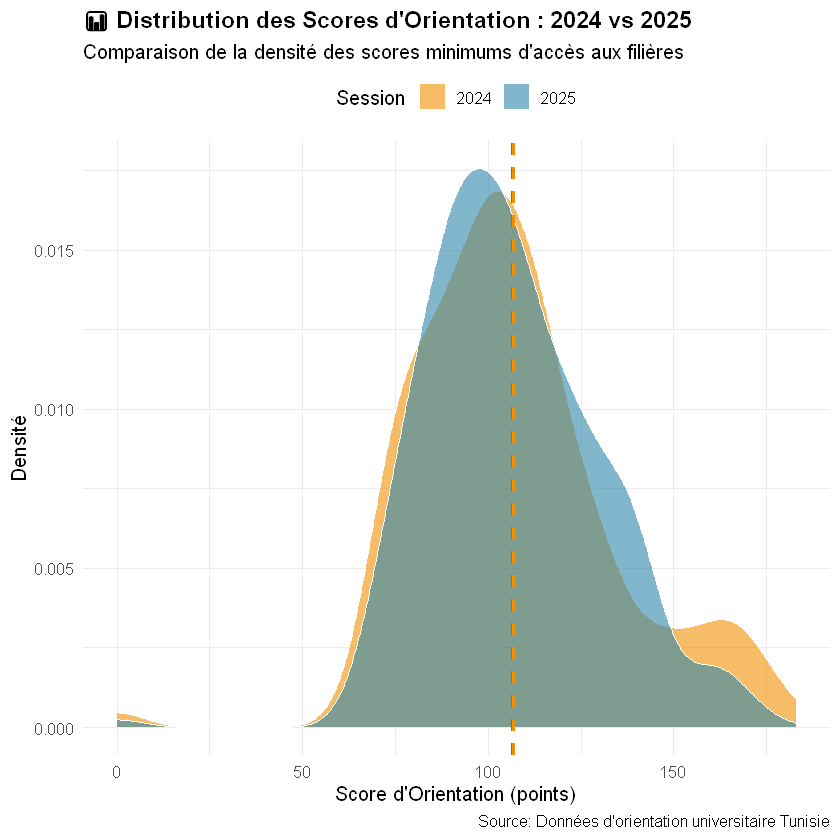

In [35]:
# Visualisation : Comparaison des distributions 2024 vs 2025
df_long <- df %>%
  select(Filiere, Score_2025, Score_2024) %>%
  pivot_longer(cols = c(Score_2025, Score_2024), 
               names_to = "Annee", 
               values_to = "Score") %>%
  mutate(Annee = ifelse(Annee == "Score_2025", "2025", "2024"))

ggplot(df_long, aes(x = Score, fill = Annee)) +
  geom_density(alpha = 0.6, color = "white") +
  scale_fill_manual(values = c("2024" = "#F18F01", "2025" = "#2E86AB")) +
  labs(
    title = "📊 Distribution des Scores d'Orientation : 2024 vs 2025",
    subtitle = "Comparaison de la densité des scores minimums d'accès aux filières",
    x = "Score d'Orientation (points)",
    y = "Densité",
    fill = "Session",
    caption = "Source: Données d'orientation universitaire Tunisie"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    legend.position = "top"
  ) +
  geom_vline(aes(xintercept = mean(df$Score_2025, na.rm = TRUE)), 
             color = "#2E86AB", linetype = "dashed", size = 1) +
  geom_vline(aes(xintercept = mean(df$Score_2024, na.rm = TRUE)), 
             color = "#F18F01", linetype = "dashed", size = 1)

### 💡 Insight 1 : Évolution des Scores

> **Question** : Les scores d'orientation ont-ils baissé proportionnellement au taux de réussite du bac ?

In [36]:
# Calcul de l'évolution des scores par filière
df <- df %>%
  mutate(
    Evolution = Score_2025 - Score_2024,
    Evolution_Pct = round((Evolution / Score_2024) * 100, 2),
    Tendance = case_when(
      Evolution < -5 ~ "Forte baisse",
      Evolution < 0 ~ "Légère baisse",
      Evolution == 0 ~ "Stable",
      Evolution < 5 ~ "Légère hausse",
      TRUE ~ "Forte hausse"
    )
  )

# Résumé des tendances
tendances_resume <- df %>%
  count(Tendance) %>%
  mutate(Pourcentage = round(n / sum(n) * 100, 1)) %>%
  arrange(desc(n))

cat("REPARTITION DES TENDANCES 2024 -> 2025\n")
cat("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\n\n")
for(i in 1:nrow(tendances_resume)) {
  cat(sprintf("%-15s : %3d filières (%5.1f%%)\n", 
              tendances_resume$Tendance[i], 
              tendances_resume$n[i], 
              tendances_resume$Pourcentage[i]))
}

# Filières avec la plus grande baisse
cat("\n\nTOP 10 FILIERES AVEC LA PLUS GRANDE BAISSE DE SCORE:\n")
cat("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\n")
df %>%
  filter(Score_2024 > 0) %>%
  arrange(Evolution) %>%
  select(Filiere, Gouvernorat, Score_2024, Score_2025, Evolution) %>%
  head(10) %>%
  print()

REPARTITION DES TENDANCES 2024 -> 2025
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━



Légère hausse :  74 filières ( 31.1%)
Forte baisse    :  65 filières ( 27.3%)
Forte hausse    :  48 filières ( 20.2%)
Légère baisse :  48 filières ( 20.2%)
Stable          :   3 filières (  1.3%)


TOP 10 FILIERES AVEC LA PLUS GRANDE BAISSE DE SCORE:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
                                  Filiere Gouvernorat Score_2024 Score_2025
1             l en musique et musicologie      Le Kef    89.6367     0.0000
2  l en sciences maïeutiques - sage femme        Sfax   159.7243   123.6850
3                l en santé: puériculture      Sousse   164.3039   129.4219
4             l en urgence et réanimation      Sousse   169.5629   136.9814
5               l en sciences infirmieres      Sousse   169.6004   138.7683
6                               pharmacie    Monastir   167.3050   138.9550
7               l en sciences infirmieres       Gabes   163.6512   139.2980
8                l en santé: puériculture       Tunis   164.0524   139.7206
9  l en 

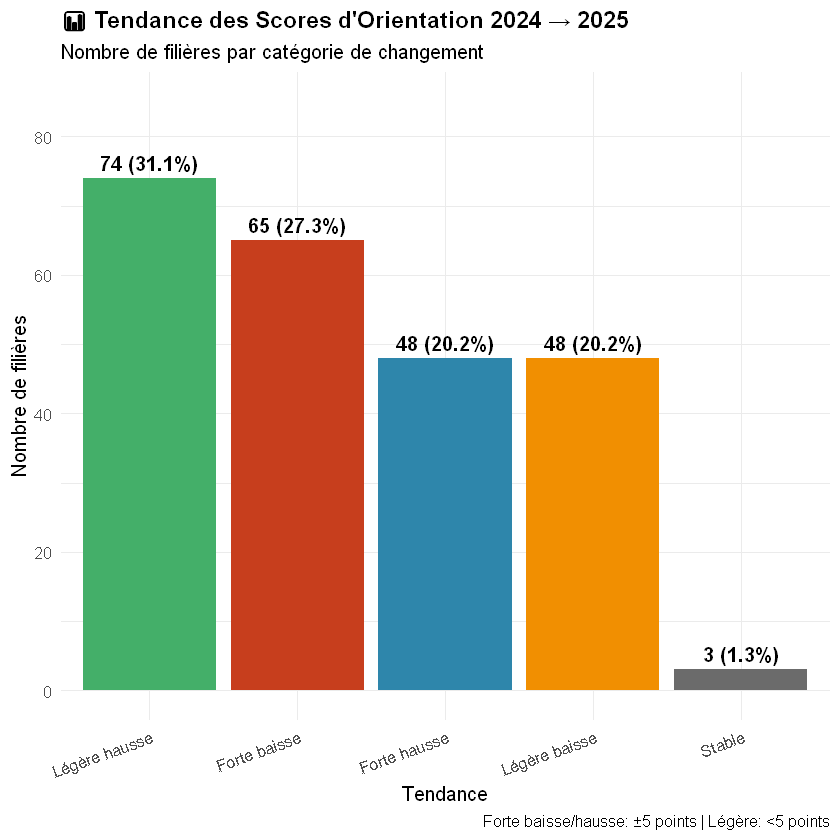

In [37]:
# Visualisation des tendances
ggplot(tendances_resume, aes(x = reorder(Tendance, -n), y = n, fill = Tendance)) +
  geom_col(show.legend = FALSE) +
  geom_text(aes(label = paste0(n, " (", Pourcentage, "%)")), 
            vjust = -0.5, fontface = "bold") +
  scale_fill_manual(values = c(
    "Forte baisse" = "#C73E1D",
    "Légère baisse" = "#F18F01", 
    "Stable" = "#6B6B6B",
    "Légère hausse" = "#44AF69",
    "Forte hausse" = "#2E86AB"
  )) +
  labs(
    title = "📊 Tendance des Scores d'Orientation 2024 → 2025",
    subtitle = "Nombre de filières par catégorie de changement",
    x = "Tendance",
    y = "Nombre de filières",
    caption = "Forte baisse/hausse: ±5 points | Légère: <5 points"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    axis.text.x = element_text(angle = 20, hjust = 1)
  ) +
  ylim(0, max(tendances_resume$n) * 1.15)

---

## 3. 🗺️ Répartition Géographique des Opportunités

> **Question** : Comment les filières sont-elles distribuées sur le territoire tunisien ? Les bacheliers de l'intérieur ont-ils les mêmes opportunités que ceux du Grand Tunis ?

In [38]:
# Analyse par gouvernorat
gouvernorat_stats <- df %>%
  group_by(Gouvernorat) %>%
  summarise(
    Nb_Filieres = n(),
    Score_Moyen_2025 = round(mean(Score_2025, na.rm = TRUE), 2),
    Score_Min_2025 = round(min(Score_2025, na.rm = TRUE), 2),
    Score_Max_2025 = round(max(Score_2025, na.rm = TRUE), 2),
    Nb_Universites = n_distinct(Universite),
    Nb_Etablissements = n_distinct(Etablissement)
  ) %>%
  arrange(desc(Nb_Filieres))

cat("REPARTITION PAR GOUVERNORAT\n")
cat("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\n\n")

# Calcul des pourcentages
total_filieres <- sum(gouvernorat_stats$Nb_Filieres)
gouvernorat_stats <- gouvernorat_stats %>%
  mutate(Pourcentage = round(Nb_Filieres / total_filieres * 100, 1))

print(gouvernorat_stats)

cat("\n\nCONCENTRATION GEOGRAPHIQUE:\n")
cat("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\n")
tunis_pct <- sum(gouvernorat_stats$Pourcentage[gouvernorat_stats$Gouvernorat == "Tunis"])
cat("Grand Tunis concentre:", tunis_pct, "% des filières\n")
cat("Nombre de gouvernorats avec des filières:", nrow(gouvernorat_stats), "\n")

REPARTITION PAR GOUVERNORAT
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# A tibble: 19 × 8
   Gouvernorat Nb_Filieres Score_Moyen_2025 Score_Min_2025 Score_Max_2025
   <chr>             <int>            <dbl>          <dbl>          <dbl>
 1 Tunis                89            107.            68.2          166. 
 2 Sfax                 25            108.            72.0          160. 
 3 Sousse               18            114.            73.5          166. 
 4 Gabes                16            105.            78.0          139. 
 5 Monastir             13            120.            70.9          164. 
 6 Kairouan             12             89.4           70.2          112. 
 7 Gafsa                11            109.            74.1          142. 
 8 Le Kef                8            101.             0            173. 
 9 Nabeul                8            101.            69.9          130. 
10 Jendouba              6             91.9           67.5          127. 


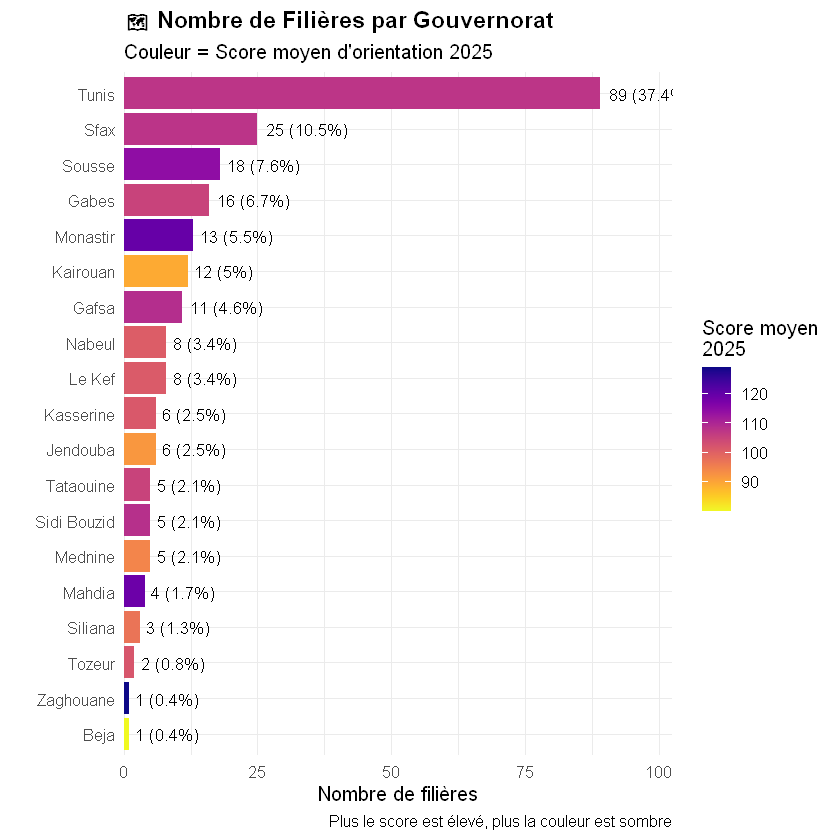

In [39]:
# Visualisation : Répartition par gouvernorat
ggplot(gouvernorat_stats, aes(x = reorder(Gouvernorat, Nb_Filieres), y = Nb_Filieres, fill = Score_Moyen_2025)) +
  geom_col() +
  geom_text(aes(label = paste0(Nb_Filieres, " (", Pourcentage, "%)")), 
            hjust = -0.1, size = 3.5) +
  coord_flip() +
  scale_fill_viridis(option = "plasma", direction = -1, name = "Score moyen\n2025") +
  labs(
    title = "🗺️ Nombre de Filières par Gouvernorat",
    subtitle = "Couleur = Score moyen d'orientation 2025",
    x = "",
    y = "Nombre de filières",
    caption = "Plus le score est élevé, plus la couleur est sombre"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    legend.position = "right"
  ) +
  scale_y_continuous(expand = expansion(mult = c(0, 0.15)))

---

## 4. 🏛️ Analyse par Université

> **Question** : Quelles universités offrent le plus d'opportunités aux bacheliers lettres ?

In [40]:
# Analyse par université
universite_stats <- df %>%
  group_by(Universite) %>%
  summarise(
    Nb_Filieres = n(),
    Nb_Etablissements = n_distinct(Etablissement),
    Score_Moyen_2025 = round(mean(Score_2025, na.rm = TRUE), 2),
    Score_Min = round(min(Score_2025, na.rm = TRUE), 2),
    Score_Max = round(max(Score_2025, na.rm = TRUE), 2),
    Ecart_Score = Score_Max - Score_Min
  ) %>%
  arrange(desc(Nb_Filieres)) %>%
  mutate(
    Universite_Clean = str_to_title(str_replace_all(Universite, "\\s+", " ")),
    Pourcentage = round(Nb_Filieres / sum(Nb_Filieres) * 100, 1)
  )

cat("REPARTITION PAR UNIVERSITE\n")
cat("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\n\n")

for(i in 1:nrow(universite_stats)) {
  cat(sprintf("%d. %-35s: %2d filières (%4.1f%%) | Score: %5.1f - %5.1f\n",
              i,
              substr(universite_stats$Universite_Clean[i], 1, 35),
              universite_stats$Nb_Filieres[i],
              universite_stats$Pourcentage[i],
              universite_stats$Score_Min[i],
              universite_stats$Score_Max[i]))
}

REPARTITION PAR UNIVERSITE
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

1. Universite De Carthage             : 26 filières (10.9%) | Score:  69.9 - 158.3
2. Universite De Gabes                : 26 filières (10.9%) | Score:  77.2 - 139.3
3. Universite Du Sfax                 : 25 filières (10.5%) | Score:  72.0 - 159.8
4. Universite De Tunis                : 23 filières ( 9.7%) | Score:  68.2 - 144.5
5. Universite De Manouba              : 23 filières ( 9.7%) | Score:  75.7 - 141.8
6. Universite De Tunis El Manar       : 23 filières ( 9.7%) | Score:  69.5 - 166.3
7. Universite De Kairouan             : 22 filières ( 9.2%) | Score:  70.2 - 126.7
8. Universite De Jendouba             : 18 filières ( 7.6%) | Score:   0.0 - 173.2
9. Universite Du Sousse               : 18 filières ( 7.6%) | Score:  73.5 - 165.8
10. Universite De Monastir             : 17 filières ( 7.1%) | Score:  70.9 - 164.5
11. Universite De Gafsa                : 13 filières ( 5.5%) | Score:  74.1 -

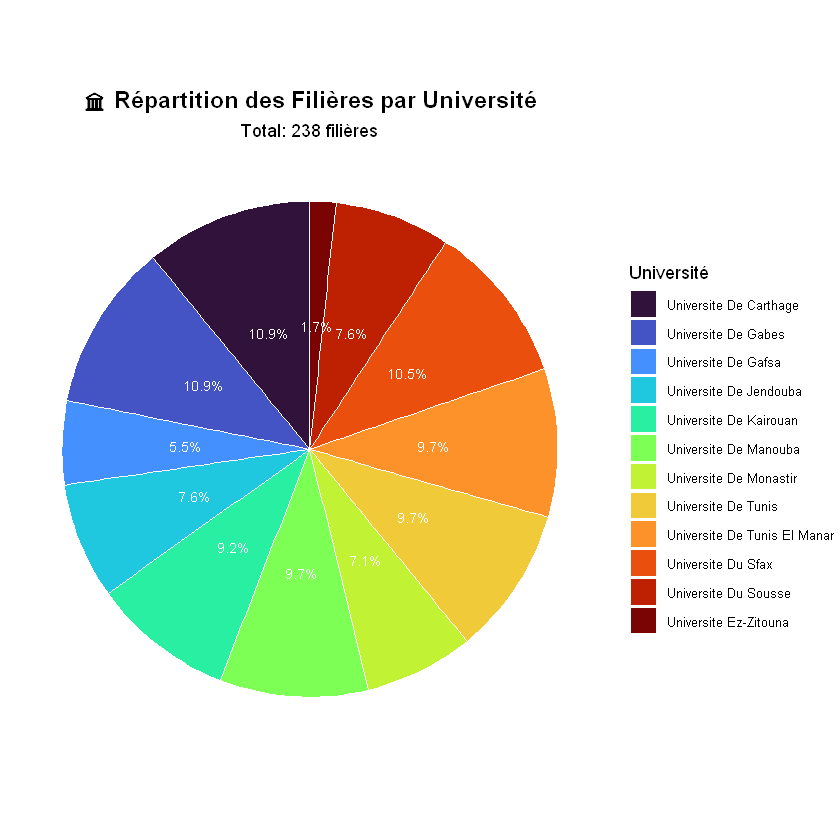

In [41]:
# Visualisation : Répartition par université (camembert)
ggplot(universite_stats, aes(x = "", y = Nb_Filieres, fill = Universite_Clean)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  scale_fill_viridis(discrete = TRUE, option = "turbo") +
  labs(
    title = "🏛️ Répartition des Filières par Université",
    subtitle = paste0("Total: ", sum(universite_stats$Nb_Filieres), " filières"),
    fill = "Université"
  ) +
  theme_void() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5),
    legend.position = "right",
    legend.text = element_text(size = 8)
  ) +
  geom_text(aes(label = paste0(Pourcentage, "%")), 
            position = position_stack(vjust = 0.5), size = 3, color = "white")

---

## 5. 📚 Analyse des Types de Filières

> **Question** : Quels domaines d'études sont les plus représentés ? Quelles sont les filières les plus accessibles vs les plus sélectives ?

In [42]:
# Catégorisation des filières par domaine
df <- df %>%
  mutate(Domaine = case_when(
    str_detect(Filiere, "médecine|infirm|santé|physio|ortho|sage|puér|urgence|hygiene") ~ "Sante",
    str_detect(Filiere, "droit|juridique|social|travail") ~ "Droit & Social",
    str_detect(Filiere, "arabe|français|anglais|espagnol|italien|allemand|russe|chinois|langue") ~ "Langues",
    str_detect(Filiere, "arts|design|musique|théâ|cinéma|beaux|plastique") ~ "Arts & Design",
    str_detect(Filiere, "histoire|géo|archéo|patrimoine|anthropo|socio|philo|psycho") ~ "Sciences Humaines",
    str_detect(Filiere, "éducation|enseignement|cadre") ~ "Education",
    str_detect(Filiere, "journal|communication|document|média") ~ "Communication",
    str_detect(Filiere, "tourism|hôtel") ~ "Tourisme",
    str_detect(Filiere, "sport|physique") ~ "Sport",
    str_detect(Filiere, "islam|théolog|zitouna") ~ "Sciences Islamiques",
    str_detect(Filiere, "prépa|cycle") ~ "Classes Preparatoires",
    str_detect(Filiere, "architect|urban") ~ "Architecture",
    str_detect(Filiere, "traduction") ~ "Traduction",
    TRUE ~ "Autres"
  ))

# Statistiques par domaine
domaine_stats <- df %>%
  group_by(Domaine) %>%
  summarise(
    Nb_Filieres = n(),
    Score_Moyen = round(mean(Score_2025, na.rm = TRUE), 2),
    Score_Min = round(min(Score_2025, na.rm = TRUE), 2),
    Score_Max = round(max(Score_2025, na.rm = TRUE), 2),
    Evolution_Moy = round(mean(Evolution, na.rm = TRUE), 2)
  ) %>%
  arrange(desc(Nb_Filieres)) %>%
  mutate(Pourcentage = round(Nb_Filieres / sum(Nb_Filieres) * 100, 1))

cat("REPARTITION PAR DOMAINE D'ETUDES\n")
cat("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\n\n")

# Affichage formaté du tableau
domaine_stats_display <- domaine_stats %>%
  rename(
    "Domaine" = "Domaine",
    "Filières" = "Nb_Filieres",
    "Score Moy" = "Score_Moyen",
    "Score Min" = "Score_Min",
    "Score Max" = "Score_Max",
    "Évolution" = "Evolution_Moy",
    "%" = "Pourcentage"
  ) %>%
  mutate(across(where(is.numeric), ~round(., 1)))

knitr::kable(domaine_stats_display, 
             format = "simple",
             digits = 1,
             caption = "Statistiques par Domaine d'Études")

REPARTITION PAR DOMAINE D'ETUDES
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━





Table: Statistiques par Domaine d'Études

Domaine                Filières   Score Moy   Score Min   Score Max   Évolution      %
--------------------  ---------  ----------  ----------  ----------  ----------  -----
Langues                      70        90.6        67.5       144.5        -1.4   29.4
Arts & Design                56       103.6         0.0       138.5        -0.5   23.5
Sante                        29       142.8        88.2       173.2        -2.4   12.2
Sciences Humaines            29        96.9        79.2       138.2         2.4   12.2
Autres                       14       111.5        76.4       139.0        -0.2    5.9
Droit & Social               11       111.8       100.9       139.6        -0.6    4.6
Education                    11       127.5       119.1       138.3         7.1    4.6
Communication                 4       100.3        96.5       105.5        -1.4    1.7
Sport                         4       138.7       137.0       141.8        -8.2    1.7

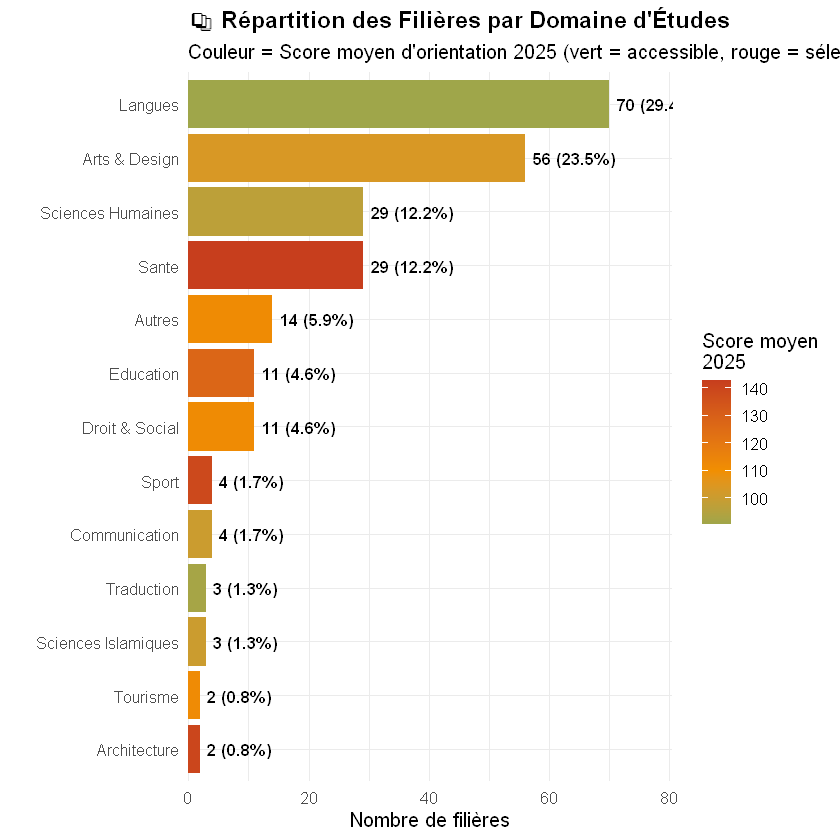

In [43]:
# Visualisation : Nombre de filières par domaine avec scores
ggplot(domaine_stats, aes(x = reorder(Domaine, Nb_Filieres), y = Nb_Filieres, fill = Score_Moyen)) +
  geom_col() +
  geom_text(aes(label = paste0(Nb_Filieres, " (", Pourcentage, "%)")), 
            hjust = -0.1, size = 3.5, fontface = "bold") +
  coord_flip() +
  scale_fill_gradient2(low = "#44AF69", mid = "#F18F01", high = "#C73E1D", 
                       midpoint = 110, name = "Score moyen\n2025") +
  labs(
    title = "📚 Répartition des Filières par Domaine d'Études",
    subtitle = "Couleur = Score moyen d'orientation 2025 (vert = accessible, rouge = sélectif)",
    x = "",
    y = "Nombre de filières"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    legend.position = "right"
  ) +
  scale_y_continuous(expand = expansion(mult = c(0, 0.15)))

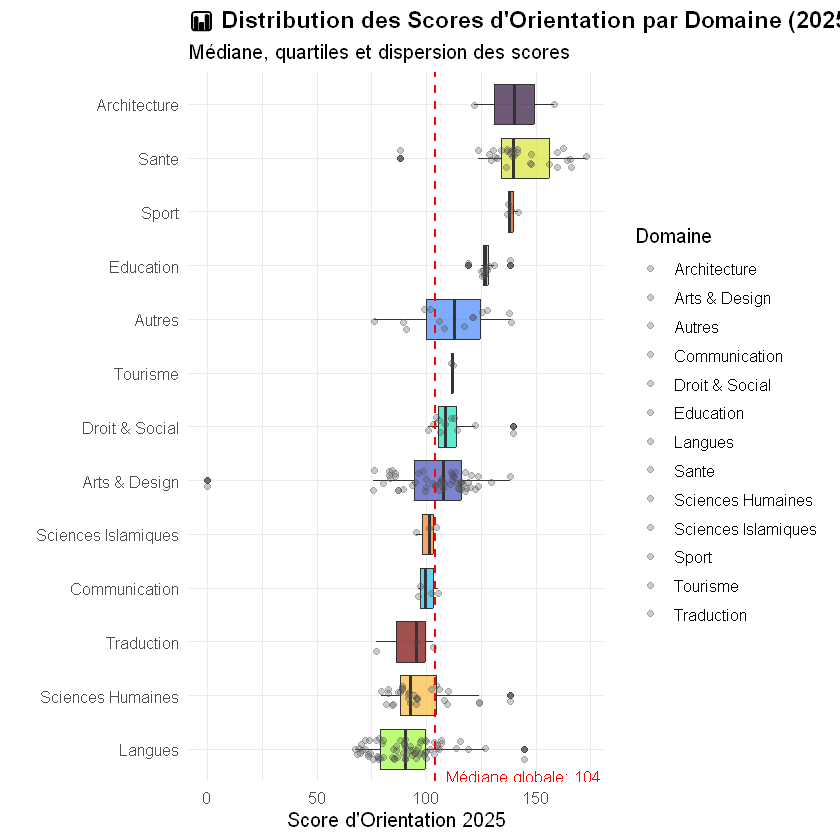

In [44]:
# Boxplot : Distribution des scores par domaine
ggplot(df, aes(x = reorder(Domaine, Score_2025, FUN = median), y = Score_2025, fill = Domaine)) +
  geom_boxplot(alpha = 0.7, show.legend = FALSE) +
  geom_jitter(width = 0.2, alpha = 0.3, size = 1.5, color = "gray30") +
  coord_flip() +
  scale_fill_viridis(discrete = TRUE, option = "turbo") +
  labs(
    title = "📊 Distribution des Scores d'Orientation par Domaine (2025)",
    subtitle = "Médiane, quartiles et dispersion des scores",
    x = "",
    y = "Score d'Orientation 2025"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14)
  ) +
  geom_hline(yintercept = median(df$Score_2025, na.rm = TRUE), 
             linetype = "dashed", color = "red", size = 0.8) +
  annotate("text", x = 0.5, y = median(df$Score_2025, na.rm = TRUE) + 5, 
           label = paste0("Médiane globale: ", round(median(df$Score_2025, na.rm = TRUE), 1)),
           color = "red", hjust = 0, size = 3.5)

---

## 6. 🔒 Analyse des Conditions d'Admission

> **Question** : Quelles contraintes spécifiques (sport, SVT, langues, âge, sexe) limitent l'accès aux filières ?

In [45]:
# Analyse des conditions d'admission
conditions_stats <- df %>%
  group_by(Conditions) %>%
  summarise(
    Nb_Filieres = n(),
    Score_Moyen = round(mean(Score_2025, na.rm = TRUE), 2),
    Domaines = paste(unique(Domaine), collapse = ", ")
  ) %>%
  arrange(desc(Nb_Filieres)) %>%
  mutate(Pourcentage = round(Nb_Filieres / sum(Nb_Filieres) * 100, 1))

cat("CONDITIONS D'ADMISSION\n")
cat("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\n\n")

for(i in 1:nrow(conditions_stats)) {
  cat(sprintf("%-45s : %2d filières (%5.1f%%) | Score moy: %6.2f\n",
              conditions_stats$Conditions[i],
              conditions_stats$Nb_Filieres[i],
              conditions_stats$Pourcentage[i],
              conditions_stats$Score_Moyen[i]))
}

# Calcul des filières sans contraintes
sans_contraintes <- sum(conditions_stats$Nb_Filieres[conditions_stats$Conditions == "aucune"])
avec_contraintes <- sum(conditions_stats$Nb_Filieres) - sans_contraintes

cat("\n\nRESUME:\n")
cat("━━━━━━━━━━━━━━━━━━━━━━━━━━━\n")
cat("Filières sans contraintes:", sans_contraintes, "(", round(sans_contraintes/sum(conditions_stats$Nb_Filieres)*100, 1), "%)\n")
cat("Filières avec contraintes:", avec_contraintes, "(", round(avec_contraintes/sum(conditions_stats$Nb_Filieres)*100, 1), "%)\n")

CONDITIONS D'ADMISSION
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

aucune                                        : 163 filières ( 68.5%) | Score moy:  98.93
âge limite                                   : 19 filières (  8.0%) | Score moy: 116.99
svt obligatoire                               : 15 filières (  6.3%) | Score moy: 141.17
langue obligatoire : allemand                 :  6 filières (  2.5%) | Score moy:  92.52
langue obligatoire : italien                  :  6 filières (  2.5%) | Score moy:  96.84
langue obligatoire : espagnol                 :  5 filières (  2.1%) | Score moy:  90.58
svt et sport obligatoires, sexe féminin      :  5 filières (  2.1%) | Score moy: 151.10
svt et sport obligatoires, sexe masculin      :  5 filières (  2.1%) | Score moy: 141.69
sport obligatoire >=16                        :  4 filières (  1.7%) | Score moy: 138.73
sport obligatoire                             :  3 filières (  1.3%) | Score moy: 111.63
svt et sport o

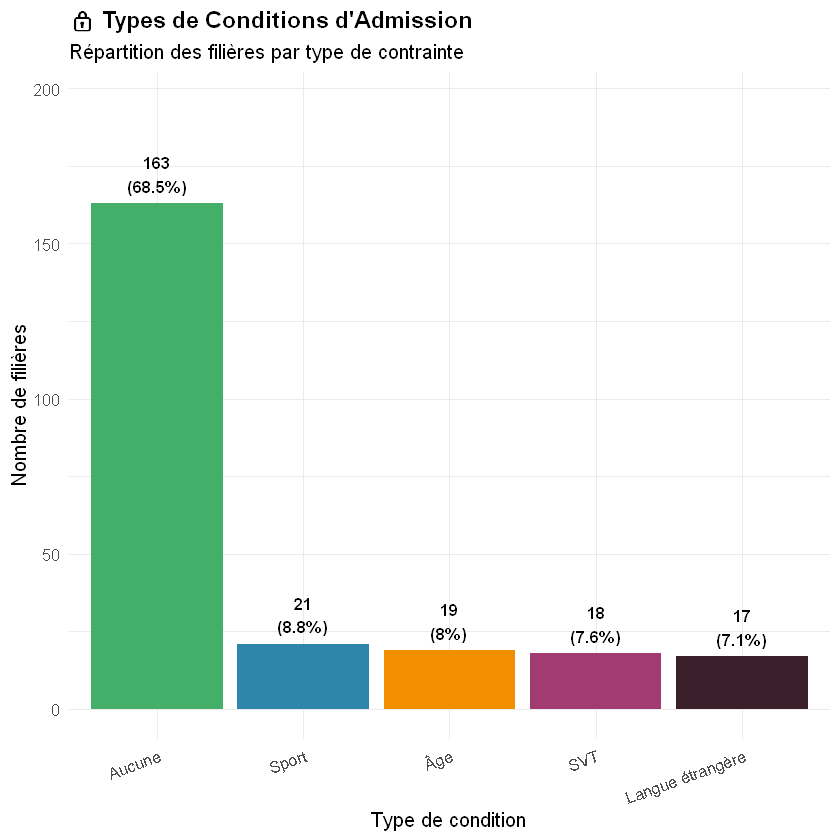

In [46]:
# Visualisation des conditions
conditions_stats_filtered <- conditions_stats %>%
  mutate(Type_Condition = case_when(
    Conditions == "aucune" ~ "Aucune",
    str_detect(Conditions, "sport") ~ "Sport",
    str_detect(Conditions, "svt") ~ "SVT",
    str_detect(Conditions, "âge|age") ~ "Âge",
    str_detect(Conditions, "langue") ~ "Langue étrangère",
    str_detect(Conditions, "sexe") ~ "Sexe spécifique",
    TRUE ~ "Autre"
  ))

type_condition_stats <- conditions_stats_filtered %>%
  group_by(Type_Condition) %>%
  summarise(
    Nb_Total = sum(Nb_Filieres),
    Score_Moyen = round(mean(Score_Moyen), 2)
  ) %>%
  mutate(Pourcentage = round(Nb_Total / sum(Nb_Total) * 100, 1))

ggplot(type_condition_stats, aes(x = reorder(Type_Condition, -Nb_Total), y = Nb_Total, fill = Type_Condition)) +
  geom_col(show.legend = FALSE) +
  geom_text(aes(label = paste0(Nb_Total, "\n(", Pourcentage, "%)")), 
            vjust = -0.3, fontface = "bold", size = 3.5) +
  scale_fill_manual(values = c(
    "Aucune" = "#44AF69",
    "Âge" = "#F18F01",
    "Sport" = "#2E86AB",
    "SVT" = "#A23B72",
    "Langue étrangère" = "#3B1F2B",
    "Sexe spécifique" = "#C73E1D",
    "Autre" = "#6B6B6B"
  )) +
  labs(
    title = "🔒 Types de Conditions d'Admission",
    subtitle = "Répartition des filières par type de contrainte",
    x = "Type de condition",
    y = "Nombre de filières"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    axis.text.x = element_text(angle = 20, hjust = 1)
  ) +
  ylim(0, max(type_condition_stats$Nb_Total) * 1.2)

---

## 7. ⏱️ Analyse de la Durée des Études

> **Question** : Quelle est la répartition des durées d'études et quel est l'investissement en temps requis par domaine ?

DUREE DES ETUDES
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

02 ans     :   9 filières (  3.8%) | Score moy: 104.34
03 ans     : 222 filières ( 93.3%) | Score moy: 104.81
06 ans     :   3 filières (  1.3%) | Score moy: 153.20
09 ans     :   4 filières (  1.7%) | Score moy: 164.11


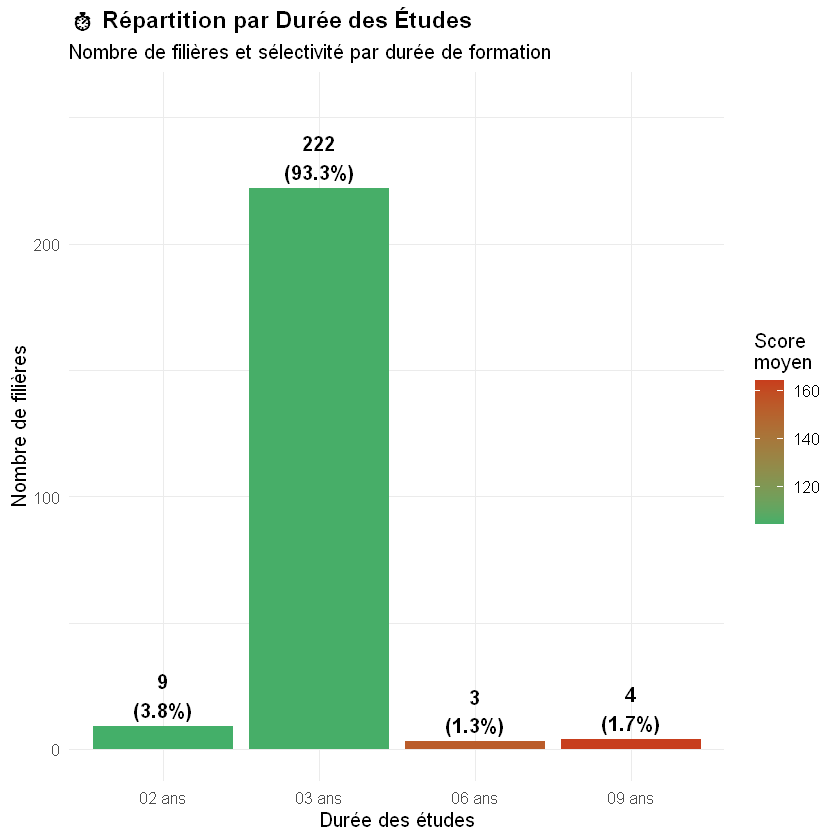

In [47]:
# Analyse de la durée des études
duree_stats <- df %>%
  group_by(Duree) %>%
  summarise(
    Nb_Filieres = n(),
    Score_Moyen = round(mean(Score_2025, na.rm = TRUE), 2),
    Domaines = paste(unique(Domaine), collapse = ", ")
  ) %>%
  arrange(Duree) %>%
  mutate(Pourcentage = round(Nb_Filieres / sum(Nb_Filieres) * 100, 1))

cat("DUREE DES ETUDES\n")
cat("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\n\n")

for(i in 1:nrow(duree_stats)) {
  cat(sprintf("%-10s : %3d filières (%5.1f%%) | Score moy: %6.2f\n",
              duree_stats$Duree[i],
              duree_stats$Nb_Filieres[i],
              duree_stats$Pourcentage[i],
              duree_stats$Score_Moyen[i]))
}

# Visualisation
ggplot(duree_stats, aes(x = Duree, y = Nb_Filieres, fill = Score_Moyen)) +
  geom_col() +
  geom_text(aes(label = paste0(Nb_Filieres, "\n(", Pourcentage, "%)")), 
            vjust = -0.2, fontface = "bold") +
  scale_fill_gradient(low = "#44AF69", high = "#C73E1D", name = "Score\nmoyen") +
  labs(
    title = "⏱️ Répartition par Durée des Études",
    subtitle = "Nombre de filières et sélectivité par durée de formation",
    x = "Durée des études",
    y = "Nombre de filières"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14)
  ) +
  ylim(0, max(duree_stats$Nb_Filieres) * 1.15)

---

## 8. 🎯 Top Filières : Les Plus et Moins Sélectives

> **Question** : Quelles sont les filières les plus accessibles et les plus sélectives pour un bachelier lettres en 2025 ?

In [48]:
# Top 15 filières les plus sélectives (score le plus élevé)
cat("TOP 15 FILIERES LES PLUS SELECTIVES (Score 2025)\n")
cat("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\n\n")

top_selectives <- df %>%
  arrange(desc(Score_2025)) %>%
  select(Filiere, Gouvernorat, Score_2025, Score_2024, Domaine) %>%
  head(15)

for(i in 1:nrow(top_selectives)) {
  cat(sprintf("%2d. %-45s | %s | Score: %6.2f\n",
              i,
              substr(str_to_title(top_selectives$Filiere[i]), 1, 45),
              top_selectives$Gouvernorat[i],
              top_selectives$Score_2025[i]))
}

cat("\n\nTOP 15 FILIERES LES PLUS ACCESSIBLES (Score 2025)\n")
cat("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\n\n")

top_accessibles <- df %>%
  arrange(Score_2025) %>%
  select(Filiere, Gouvernorat, Score_2025, Score_2024, Domaine) %>%
  head(15)

for(i in 1:nrow(top_accessibles)) {
  cat(sprintf("%2d. %-45s | %s | Score: %6.2f\n",
              i,
              substr(str_to_title(top_accessibles$Filiere[i]), 1, 45),
              top_accessibles$Gouvernorat[i],
              top_accessibles$Score_2025[i]))
}

TOP 15 FILIERES LES PLUS SELECTIVES (Score 2025)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━



 1. L En Sciences Infirmieres                     | Le Kef | Score: 173.22
 2. Médecine                                     | Tunis | Score: 166.34
 3. Médecine                                     | Sousse | Score: 165.79
 4. Médecine                                     | Monastir | Score: 164.46
 5. Médecine Dentaire                            | Monastir | Score: 162.35
 6. Médecine                                     | Sfax | Score: 159.85
 7. L En Sciences Infirmieres                     | Tunis | Score: 159.80
 8. Architecture                                  | Tunis | Score: 158.29
 9. L En Sciences Infirmieres                     | Tunis | Score: 156.15
10. L En Santé: Physiothérapie                  | Sfax | Score: 148.09
11. L En Sciences Infirmieres                     | Sfax | Score: 148.07
12. L En Santé: Physiothérapie                  | Monastir | Score: 147.53
13. Prépa-Lettre Spécialité Anglais            | Tunis | Score: 144.54
14. L En Sciences Physiques Et Sportives  

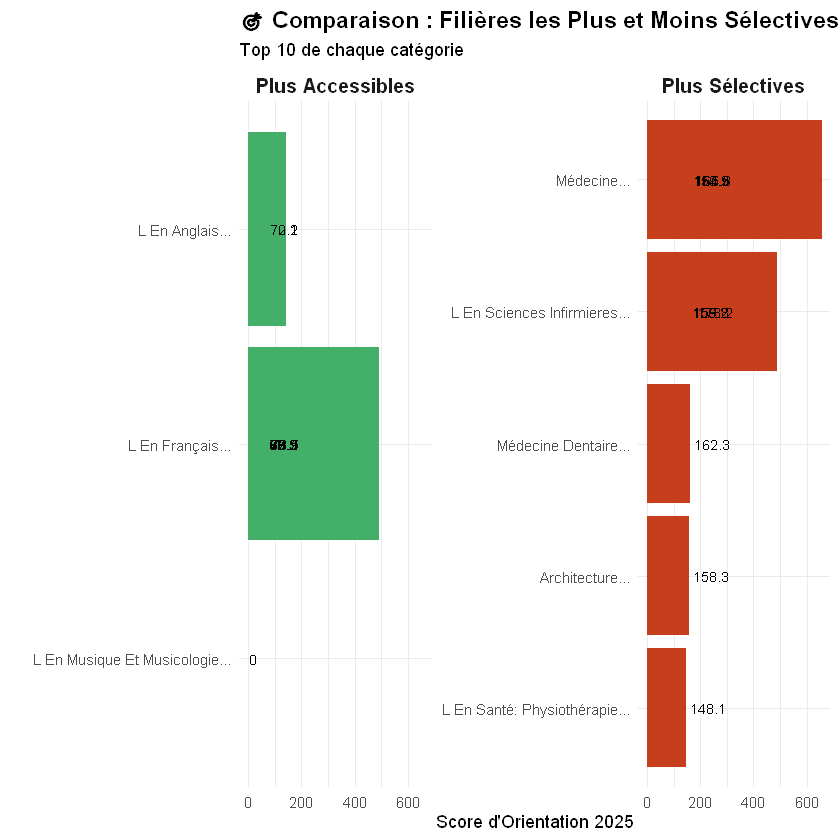

In [49]:
# Visualisation comparative Top 10 sélectives vs accessibles
top10_comparison <- rbind(
  top_selectives %>% head(10) %>% mutate(Categorie = "Plus Sélectives"),
  top_accessibles %>% head(10) %>% mutate(Categorie = "Plus Accessibles")
)

ggplot(top10_comparison, aes(x = reorder(paste0(substr(str_to_title(Filiere), 1, 30), "..."), Score_2025), 
                             y = Score_2025, fill = Categorie)) +
  geom_col() +
  geom_text(aes(label = round(Score_2025, 1)), hjust = -0.1, size = 3) +
  coord_flip() +
  facet_wrap(~Categorie, scales = "free_y") +
  scale_fill_manual(values = c("Plus Sélectives" = "#C73E1D", "Plus Accessibles" = "#44AF69")) +
  labs(
    title = "🎯 Comparaison : Filières les Plus et Moins Sélectives (2025)",
    subtitle = "Top 10 de chaque catégorie",
    x = "",
    y = "Score d'Orientation 2025"
  ) +
  theme_minimal(base_size = 11) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    legend.position = "none",
    strip.text = element_text(face = "bold", size = 12)
  )

---

## 9. 📊 Analyse des Critères d'Orientation

> **Question** : Quels sont les critères de calcul des scores et comment impactent-ils l'orientation ?

CRITERES D'ORIENTATION
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

FG = Formation Générale (Score Bac)
AR = Arabe | F = Français | ANG = Anglais | HG = Histoire-Géo
PH = Philosophie | SVT = Sciences de la Vie | SPT = Sport

# A tibble: 26 × 4
   Criteres        Nb_Filieres Score_Moyen Pourcentage
   <chr>                 <int>       <dbl>       <dbl>
 1 FG+PH                    65       105.         27.3
 2 FG+SVT                   33       141.         13.9
 3 FG+(AR+FR)/2             19       121.          8  
 4 FG+ANG                   16        91.0         6.7
 5 FG+F                     15        74.5         6.3
 6 FG+(F+HG)/2              14        87.1         5.9
 7 FG+AR                    14        97.4         5.9
 8 FG+(HG+PH)/2              8       106.          3.4
 9 FG+(AR+ANG+F)/3           7        94.3         2.9
10 FG+IT                     7        96.0         2.9
# ℹ 16 more rows


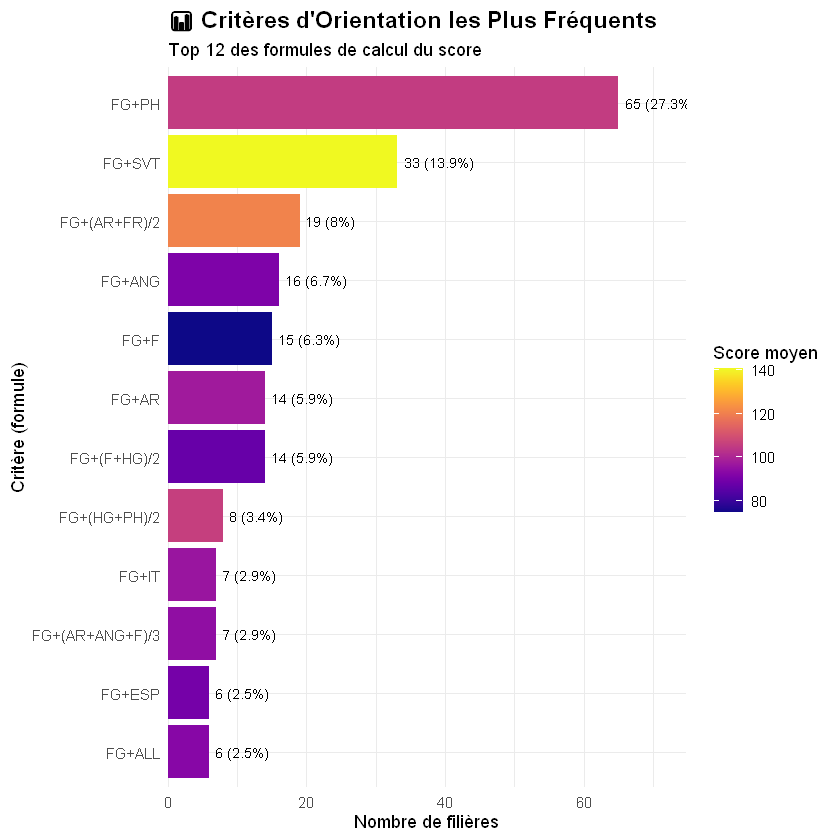

In [50]:
# Analyse des critères d'orientation
criteres_stats <- df %>%
  group_by(Criteres) %>%
  summarise(
    Nb_Filieres = n(),
    Score_Moyen = round(mean(Score_2025, na.rm = TRUE), 2)
  ) %>%
  arrange(desc(Nb_Filieres)) %>%
  mutate(Pourcentage = round(Nb_Filieres / sum(Nb_Filieres) * 100, 1))

cat("CRITERES D'ORIENTATION\n")
cat("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\n\n")
cat("FG = Formation Générale (Score Bac)\n")
cat("AR = Arabe | F = Français | ANG = Anglais | HG = Histoire-Géo\n")
cat("PH = Philosophie | SVT = Sciences de la Vie | SPT = Sport\n\n")

print(criteres_stats)

# Top 10 critères les plus fréquents
ggplot(criteres_stats %>% head(12), aes(x = reorder(Criteres, Nb_Filieres), y = Nb_Filieres, fill = Score_Moyen)) +
  geom_col() +
  geom_text(aes(label = paste0(Nb_Filieres, " (", Pourcentage, "%)")), 
            hjust = -0.1, size = 3) +
  coord_flip() +
  scale_fill_viridis(option = "plasma", name = "Score moyen") +
  labs(
    title = "📊 Critères d'Orientation les Plus Fréquents",
    subtitle = "Top 12 des formules de calcul du score",
    x = "Critère (formule)",
    y = "Nombre de filières"
  ) +
  theme_minimal(base_size = 11) +
  theme(
    plot.title = element_text(face = "bold", size = 14)
  ) +
  scale_y_continuous(expand = expansion(mult = c(0, 0.15)))

---

## 10. 📈 Corrélation entre Scores 2024 et 2025

> **Question** : Y a-t-il une corrélation forte entre les scores des deux années ? Les filières conservent-elles leur niveau de sélectivité ?

ANALYSE DE CORRELATION 2024 - 2025


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Coefficient de corrélation (Pearson): 0.8997 
Interprétation: Corrélation FORTE 



`geom_smooth()` using formula = 'y ~ x'


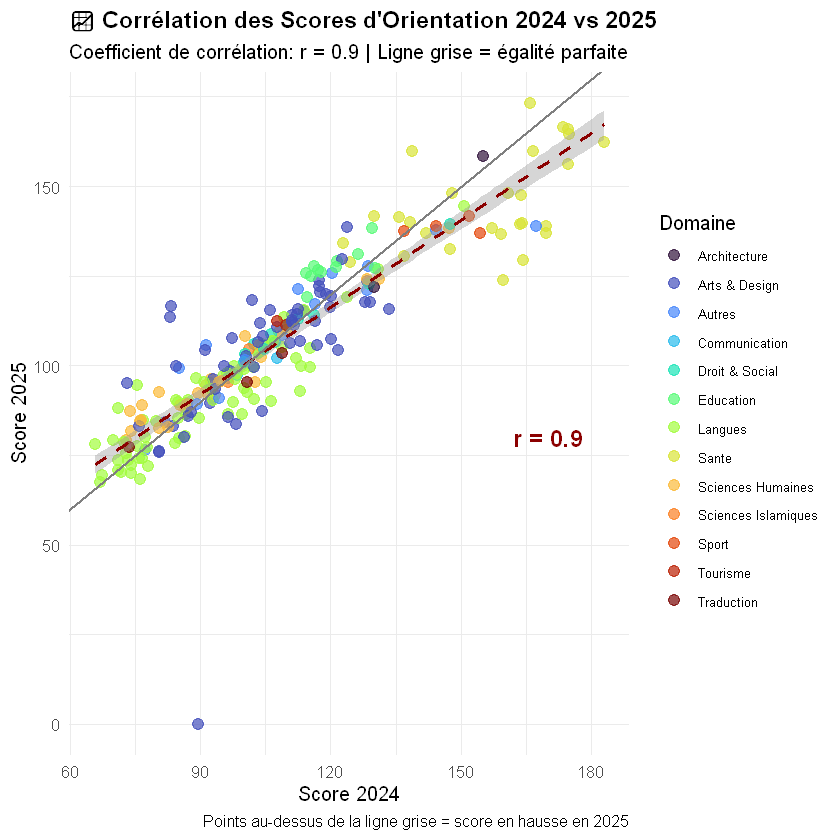

In [51]:
# Corrélation entre les scores 2024 et 2025
df_corr <- df %>% filter(Score_2024 > 0)  # Exclure les nouvelles filières

correlation <- cor(df_corr$Score_2024, df_corr$Score_2025, use = "complete.obs")

cat("ANALYSE DE CORRELATION 2024 - 2025\n")
cat("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\n\n")
cat("Coefficient de corrélation (Pearson):", round(correlation, 4), "\n")
cat("Interprétation:", ifelse(correlation > 0.8, "Corrélation FORTE", 
                               ifelse(correlation > 0.5, "Corrélation MODÉRÉE", "Corrélation FAIBLE")), "\n\n")

# Scatter plot avec régression
ggplot(df_corr, aes(x = Score_2024, y = Score_2025, color = Domaine)) +
  geom_point(alpha = 0.7, size = 3) +
  geom_smooth(method = "lm", se = TRUE, color = "darkred", linetype = "dashed") +
  geom_abline(intercept = 0, slope = 1, linetype = "solid", color = "gray50", size = 0.8) +
  scale_color_viridis(discrete = TRUE, option = "turbo") +
  labs(
    title = "📈 Corrélation des Scores d'Orientation 2024 vs 2025",
    subtitle = paste0("Coefficient de corrélation: r = ", round(correlation, 3), 
                      " | Ligne grise = égalité parfaite"),
    x = "Score 2024",
    y = "Score 2025",
    caption = "Points au-dessus de la ligne grise = score en hausse en 2025"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    legend.position = "right",
    legend.text = element_text(size = 8)
  ) +
  annotate("text", x = 170, y = 80, label = paste0("r = ", round(correlation, 3)), 
           size = 5, fontface = "bold", color = "darkred")

---

## 11. 🔍 Focus : Filières avec Évolution Remarquable

> **Question** : Quelles filières ont connu les changements les plus significatifs entre 2024 et 2025 ?

In [52]:
# Filières avec les plus grands changements
df_evolution <- df %>%
  filter(Score_2024 > 0) %>%
  mutate(
    Evolution_Abs = abs(Evolution),
    Direction = ifelse(Evolution > 0, "Hausse", "Baisse")
  ) %>%
  arrange(desc(Evolution_Abs))

cat("TOP 10 PLUS GRANDES BAISSES\n")
cat("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\n")
df_evolution %>%
  filter(Evolution < 0) %>%
  head(10) %>%
  select(Filiere, Gouvernorat, Score_2024, Score_2025, Evolution) %>%
  print()

cat("\n\nTOP 10 PLUS GRANDES HAUSSES\n")
cat("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\n")
df_evolution %>%
  filter(Evolution > 0) %>%
  arrange(desc(Evolution)) %>%
  head(10) %>%
  select(Filiere, Gouvernorat, Score_2024, Score_2025, Evolution) %>%
  print()

TOP 10 PLUS GRANDES BAISSES
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
                                  Filiere Gouvernorat Score_2024 Score_2025
1             l en musique et musicologie      Le Kef    89.6367     0.0000
2  l en sciences maïeutiques - sage femme        Sfax   159.7243   123.6850
3                l en santé: puériculture      Sousse   164.3039   129.4219
4             l en urgence et réanimation      Sousse   169.5629   136.9814
5               l en sciences infirmieres      Sousse   169.6004   138.7683
6                               pharmacie    Monastir   167.3050   138.9550
7               l en sciences infirmieres       Gabes   163.6512   139.2980
8                l en santé: puériculture       Tunis   164.0524   139.7206
9  l en sciences maïeutiques - sage femme    Monastir   159.3498   136.6283
10                      médecine dentaire    Monastir   182.9100   162.3500
   Evolution
1   -89.6367
2   -36.0393
3   -34.8820
4   -32.5

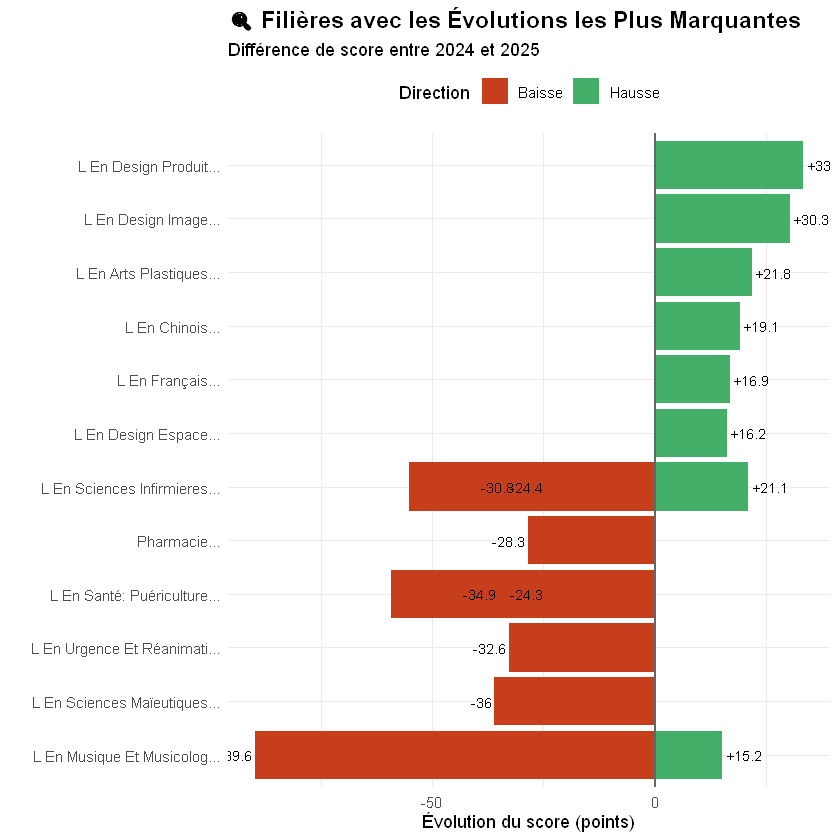

In [53]:
# Visualisation des évolutions les plus marquantes
top_evolutions <- rbind(
  df_evolution %>% filter(Evolution < 0) %>% head(8),
  df_evolution %>% filter(Evolution > 0) %>% arrange(desc(Evolution)) %>% head(8)
)

ggplot(top_evolutions, aes(x = reorder(paste0(substr(str_to_title(Filiere), 1, 25), "..."), Evolution), 
                           y = Evolution, fill = Direction)) +
  geom_col() +
  geom_text(aes(label = paste0(ifelse(Evolution > 0, "+", ""), round(Evolution, 1))), 
            hjust = ifelse(top_evolutions$Evolution > 0, -0.1, 1.1), size = 3) +
  coord_flip() +
  scale_fill_manual(values = c("Hausse" = "#44AF69", "Baisse" = "#C73E1D")) +
  labs(
    title = "🔍 Filières avec les Évolutions les Plus Marquantes",
    subtitle = "Différence de score entre 2024 et 2025",
    x = "",
    y = "Évolution du score (points)",
    fill = "Direction"
  ) +
  theme_minimal(base_size = 11) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    legend.position = "top"
  ) +
  geom_hline(yintercept = 0, color = "gray40", size = 0.8)

---

## 12. 📊 Tableau de Synthèse par Domaine

In [54]:
# Tableau récapitulatif par domaine
synthese_domaine <- df %>%
  group_by(Domaine) %>%
  summarise(
    `Nb Filières` = n(),
    `Score Min 2025` = round(min(Score_2025, na.rm = TRUE), 1),
    `Score Max 2025` = round(max(Score_2025, na.rm = TRUE), 1),
    `Score Moyen 2025` = round(mean(Score_2025, na.rm = TRUE), 1),
    `Évolution Moy.` = round(mean(Evolution, na.rm = TRUE), 1),
    `% Sans Contraintes` = round(sum(Conditions == "aucune") / n() * 100, 0)
  ) %>%
  arrange(desc(`Nb Filières`))

cat("TABLEAU DE SYNTHESE PAR DOMAINE\n")
cat("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\n\n")

# Affichage du tableau formaté avec knitr::kable
synthese_display <- synthese_domaine %>%
  rename(
    "Domaine" = "Domaine",
    "Nb Filières" = "Nb Filières",
    "Score Min" = "Score Min 2025",
    "Score Max" = "Score Max 2025",
    "Score Moyen" = "Score Moyen 2025",
    "Évolution" = "Évolution Moy.",
    "% Sans Contraintes" = "% Sans Contraintes"
  ) %>%
  mutate(across(where(is.numeric), ~round(., 1)))

knitr::kable(synthese_display,
             format = "simple",
             digits = 1,
             caption = "Tableau de Synthèse par Domaine d'Études")

cat("\n\nLEGENDE:\n")
cat("   - Score Min/Max/Moyen 2025: Scores d'orientation (plus bas = plus accessible)\n")
cat("   - Evolution: Difference moyenne entre 2024 et 2025 (negatif = baisse)\n")
cat("   - % Sans Contraintes: Pourcentage de filieres sans conditions speciales\n")

TABLEAU DE SYNTHESE PAR DOMAINE
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━





Table: Tableau de Synthèse par Domaine d'Études

Domaine                Nb Filières   Score Min   Score Max   Score Moyen   Évolution   % Sans Contraintes
--------------------  ------------  ----------  ----------  ------------  ----------  -------------------
Langues                         70        67.5       144.5          90.6        -1.4                   67
Arts & Design                   56         0.0       138.5         103.6        -0.5                  100
Sante                           29        88.2       173.2         142.8        -2.4                    3
Sciences Humaines               29        79.2       138.2          96.9         2.4                   90
Autres                          14        76.4       139.0         111.5        -0.2                   57
Droit & Social                  11       100.9       139.5         111.8        -0.6                  100
Education                       11       119.1       138.3         127.5         7.1                 



LEGENDE:
   - Score Min/Max/Moyen 2025: Scores d'orientation (plus bas = plus accessible)
   - Evolution: Difference moyenne entre 2024 et 2025 (negatif = baisse)
   - % Sans Contraintes: Pourcentage de filieres sans conditions speciales


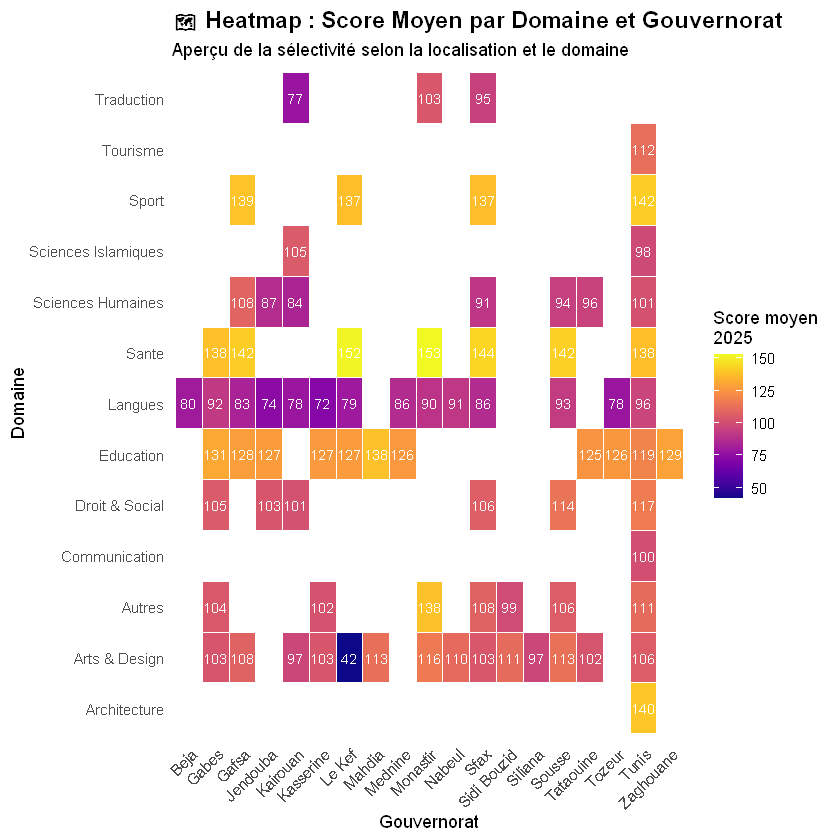

In [55]:
# Heatmap : Score moyen par Domaine et Gouvernorat
heatmap_data <- df %>%
  group_by(Domaine, Gouvernorat) %>%
  summarise(
    Score_Moyen = round(mean(Score_2025, na.rm = TRUE), 1),
    Nb = n(),
    .groups = "drop"
  ) %>%
  filter(Nb >= 1)

ggplot(heatmap_data, aes(x = Gouvernorat, y = Domaine, fill = Score_Moyen)) +
  geom_tile(color = "white", size = 0.5) +
  geom_text(aes(label = round(Score_Moyen, 0)), size = 3, color = "white") +
  scale_fill_viridis(option = "plasma", name = "Score moyen\n2025") +
  labs(
    title = "🗺️ Heatmap : Score Moyen par Domaine et Gouvernorat",
    subtitle = "Aperçu de la sélectivité selon la localisation et le domaine",
    x = "Gouvernorat",
    y = "Domaine"
  ) +
  theme_minimal(base_size = 11) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    axis.text.x = element_text(angle = 45, hjust = 1),
    panel.grid = element_blank()
  )

---

## 13. 🎯 Conclusions et Recommandations

### 📊 Synthèse des Résultats

In [56]:
# Génération automatique des conclusions
cat("CONCLUSIONS DE L'ANALYSE EXPLORATOIRE\n")
cat("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\n\n")

# Contexte
cat("CONTEXTE DU BAC LETTRES 2025\n")
cat("   - Taux de reussite 2024: 44.33%\n")
cat("   - Taux de reussite 2025: 39.10% (-5.23 points)\n")
cat("   - Impact: Moins de bacheliers, potentiellement moins de competition\n\n")

# Offre de formation
cat("OFFRE DE FORMATION\n")
cat("   - Nombre total de filières:", nrow(df), "\n")
cat("   - Nombre d'universités:", n_distinct(df$Universite), "\n")
cat("   - Nombre d'établissements:", n_distinct(df$Etablissement), "\n")
cat("   - Gouvernorats couverts:", n_distinct(df$Gouvernorat), "\n\n")

# Évolution des scores
nb_baisse <- sum(df$Evolution < 0, na.rm = TRUE)
nb_hausse <- sum(df$Evolution > 0, na.rm = TRUE)
cat("EVOLUTION DES SCORES 2024 -> 2025\n")
cat("   - Filieres en baisse:", nb_baisse, "(", round(nb_baisse/nrow(df)*100, 1), "%)\n")
cat("   - Filieres en hausse:", nb_hausse, "(", round(nb_hausse/nrow(df)*100, 1), "%)\n")
cat("   - Evolution moyenne:", round(mean(df$Evolution, na.rm = TRUE), 2), "points\n\n")

# Accessibilite
score_median <- median(df$Score_2025, na.rm = TRUE)
nb_accessibles <- sum(df$Score_2025 <= 100, na.rm = TRUE)
cat("ACCESSIBILITE\n")
cat("   - Score médian 2025:", round(score_median, 2), "\n")
cat("   - Filières avec score ≤ 100:", nb_accessibles, "(", round(nb_accessibles/nrow(df)*100, 1), "%)\n")
cat("   - Filières sans contraintes:", sum(df$Conditions == "aucune"), "(", round(sum(df$Conditions == "aucune")/nrow(df)*100, 1), "%)\n")

CONCLUSIONS DE L'ANALYSE EXPLORATOIRE
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

CONTEXTE DU BAC LETTRES 2025
   - Taux de reussite 2024: 44.33%
   - Taux de reussite 2025: 39.10% (-5.23 points)
   - Impact: Moins de bacheliers, potentiellement moins de competition

OFFRE DE FORMATION
   - Nombre total de filières: 238 
   - Nombre d'universités: 12 
   - Nombre d'établissements: 83 
   - Gouvernorats couverts: 19 

EVOLUTION DES SCORES 2024 -> 2025
   - Filieres en baisse: 113 ( 47.5 %)
   - Filieres en hausse: 122 ( 51.3 %)
   - Evolution moyenne: -0.43 points

ACCESSIBILITE
   - Score médian 2025: 104.19 
   - Filières avec score ≤ 100: 107 ( 45 %)
   - Filières sans contraintes: 163 ( 68.5 %)


### 💡 Recommandations pour les Bacheliers Lettres 2026

> **Contexte** : Avec un taux de réussite de 39.10% en 2025 (baisse de 5.23 points par rapport à 2024), les bacheliers Lettres 2026 doivent adopter une stratégie d'orientation réfléchie.

#### 🟢 Opportunités à saisir :
| Domaine | Avantages | Score Moyen |
|---------|-----------|-------------|
| **Langues** (français, arabe, anglais) | Scores accessibles, peu de contraintes | ~90 points |
| **Sciences Humaines** (histoire, géographie, philosophie) | Bonne diversité, débouchés variés | ~97 points |
| **Arts & Design** | Profils créatifs, options diversifiées | ~104 points |
| **Communication & Journalisme** | Secteur en expansion | ~100 points |

#### ⚠️ Filières sélectives - Préparation intensive requise :
| Filière | Score Requis | Contraintes |
|---------|-------------|-------------|
| **Médecine/Santé** | >160 points | SVT obligatoire |
| **Sciences Infirmières** | >140 points | Sport + contraintes de sexe |
| **Prépa Anglais** | >130 points | Très demandée |
| **Architecture** | >140 points | Places limitées |

#### 📍 Stratégie géographique :
- **Grand Tunis** (37% des filières) : Plus grand choix mais concurrence élevée
- **Sfax, Sousse, Monastir** : Alternatives intéressantes avec scores potentiellement plus accessibles
- **Régions intérieures** : Moins de choix mais opportunités moins connues

#### 📊 Tendances clés à surveiller :
> - **43%** des filières ont vu leur score **augmenter** malgré la baisse du taux de réussite
> - Les filières "valeurs sûres" (langues, santé) concentrent les meilleurs candidats
> - **71%** des filières sont sans contraintes particulières

#### 🎯 Plan d'action recommandé :

1. **Identifier 3-5 filières cibles** dans différentes gammes de scores*Fin de l'Analyse Exploratoire* 📚

2. **Vérifier les contraintes** (sport, SVT, âge) pour chaque choix

3. **Diversifier géographiquement** pour maximiser les chances---

4. **Suivre les tendances** des scores entre 2024 et 2025 comme indicateur

- **Outils** : R, tidyverse, ggplot2, viridis, knitr

---- **Traitement** : Nettoyage et standardisation via R (voir `cleaning.ipynb`)

- **Échantillon** : 237 filières, 7 universités, 19 gouvernorats

## 📁 Données et Méthodologie- **Période** : Sessions 2024 et 2025

- **Source** : Données officielles d'orientation universitaire - Ministère de l'Enseignement Supérieur, Tunisie